# Decision Trees

### Hands-on example

In this hands-on example we will explore a multiclass classification problem.  
We will use a wine dataset to classify **3 classes** of wines using some real valued features.  

In [13]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

### Data Description
1. Multiclass classification problem with 3 labels: $\{1,2,3\}$ representing 3 different cultivators
2. 13 continuous attributes describing the properties of wine like _'Alcohol'_, _'Malic Acid'_ etc.
3. UCI Machine Learning Repository

In [19]:
# Load the wine dataset
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class'] # why are we deleting 'class' column?

# Create training and test sets
# It is very important to shuffle data before performing the split
# The train and test sets should contain a good mix of all kinds of examples

# train_test_split() function shuffles data before splitting by default
y_train

54     1
140    3
148    3
81     2
88     2
      ..
8      1
73     2
144    3
118    2
99     2
Name: class, Length: 142, dtype: int64

API references:  
`pandas.read_cv()` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html  
`train_test_split()` : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Sometimes in certain classification methods it is important to preprocess data as needed. 
Techiniques like _'centering-data-on-mean'_,_''normalization'_ ,etc need to be perfmed on data to obtain better results.

It is always a good practice to take a look at the data before starting any task.

In [15]:
X_train.head() # peek at the data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
81,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680


In [16]:
X_train.max()

Alcohol                   14.83
Malic acid                 5.80
Ash                        3.23
Alcalinity of ash         30.00
Magnesium                151.00
Total phenols              3.88
Flavanoids                 5.08
Nonflavanoid phenols       0.66
Proanthocyanins            3.58
Color intensity           13.00
Hue                        1.71
OD280/OD315                4.00
Proline                 1680.00
dtype: float64

In [17]:
X_train.min()

Alcohol                  11.03
Malic acid                0.74
Ash                       1.36
Alcalinity of ash        10.60
Magnesium                70.00
Total phenols             0.98
Flavanoids                0.34
Nonflavanoid phenols      0.14
Proanthocyanins           0.41
Color intensity           1.28
Hue                       0.48
OD280/OD315               1.27
Proline                 278.00
dtype: float64

In [18]:
X_train.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000
mean,12.952746,2.376901,2.356620,19.609859,98.669014,2.251549,1.972042,0.369225,1.57338,5.093310,0.961592,2.580141,732.788732
std,0.843029,1.153270,0.273018,3.401675,13.574445,0.614344,1.006668,0.125997,0.57592,2.412267,0.242390,0.710320,318.646647
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.140000,0.41000,1.280000,0.480000,1.270000,278.000000
25%,12.290000,1.615000,2.210000,17.200000,88.000000,1.742500,1.090000,0.270000,1.17250,3.102500,0.750000,1.875000,489.750000
50%,12.945000,1.865000,2.360000,19.500000,97.000000,2.200000,2.020000,0.340000,1.53500,4.750000,0.990000,2.760000,650.000000
75%,13.687500,3.082500,2.540000,21.500000,106.000000,2.735000,2.755000,0.465000,1.95000,6.515000,1.120000,3.155000,968.750000
max,14.830000,5.800000,3.230000,30.000000,151.000000,3.880000,5.080000,0.660000,3.58000,13.000000,1.710000,4.000000,1680.000000


API References:  
`DataFrame.min()` : http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html  
`DataFrame.max()` : http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html  
`DataFrame.describe()` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


### Building the Decision Tree

Now, let us build a decision tree to classify the wine examples.  
First we need to decide the what _uncertainity measure_ to use. In this example we will use _'entropy'_.  
Examples of other uncertainity measures : _Misclasification rate_, _Gini Index_, _Entropy_.

`DecisionTreeClassifier()` API of scikit-learn has built-in support for popular strategies: _entropy_ and _gini index_.  
Full API reference : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [8]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print ('Train accuracy = ' + str(np.sum(y_pred_train == y_train)*1.0/len(y_train)))
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Train accuracy = 1.0
Test accuracy = 0.8611111111111112


In [12]:
np.array(y_train)

array([1, 3, 3, 2, 2, 2, 3, 1, 3, 2, 1, 3, 1, 2, 1, 2, 2, 1, 3, 2, 3, 2,
       1, 2, 2, 1, 3, 1, 2, 3, 3, 1, 1, 2, 3, 2, 2, 3, 3, 3, 2, 1, 1, 1,
       2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 3, 3, 1, 3, 1, 3, 2, 1, 2,
       1, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 1, 3, 1, 2, 1, 1, 3,
       2, 2, 3, 1, 1, 1, 3, 2, 2, 1, 2, 3, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2,
       3, 1, 3, 2, 3, 1, 2, 3, 2, 2])

Why is train accuracy 100%? What does this say about the leaf nodes in the tree?

### Visualizing the Tree

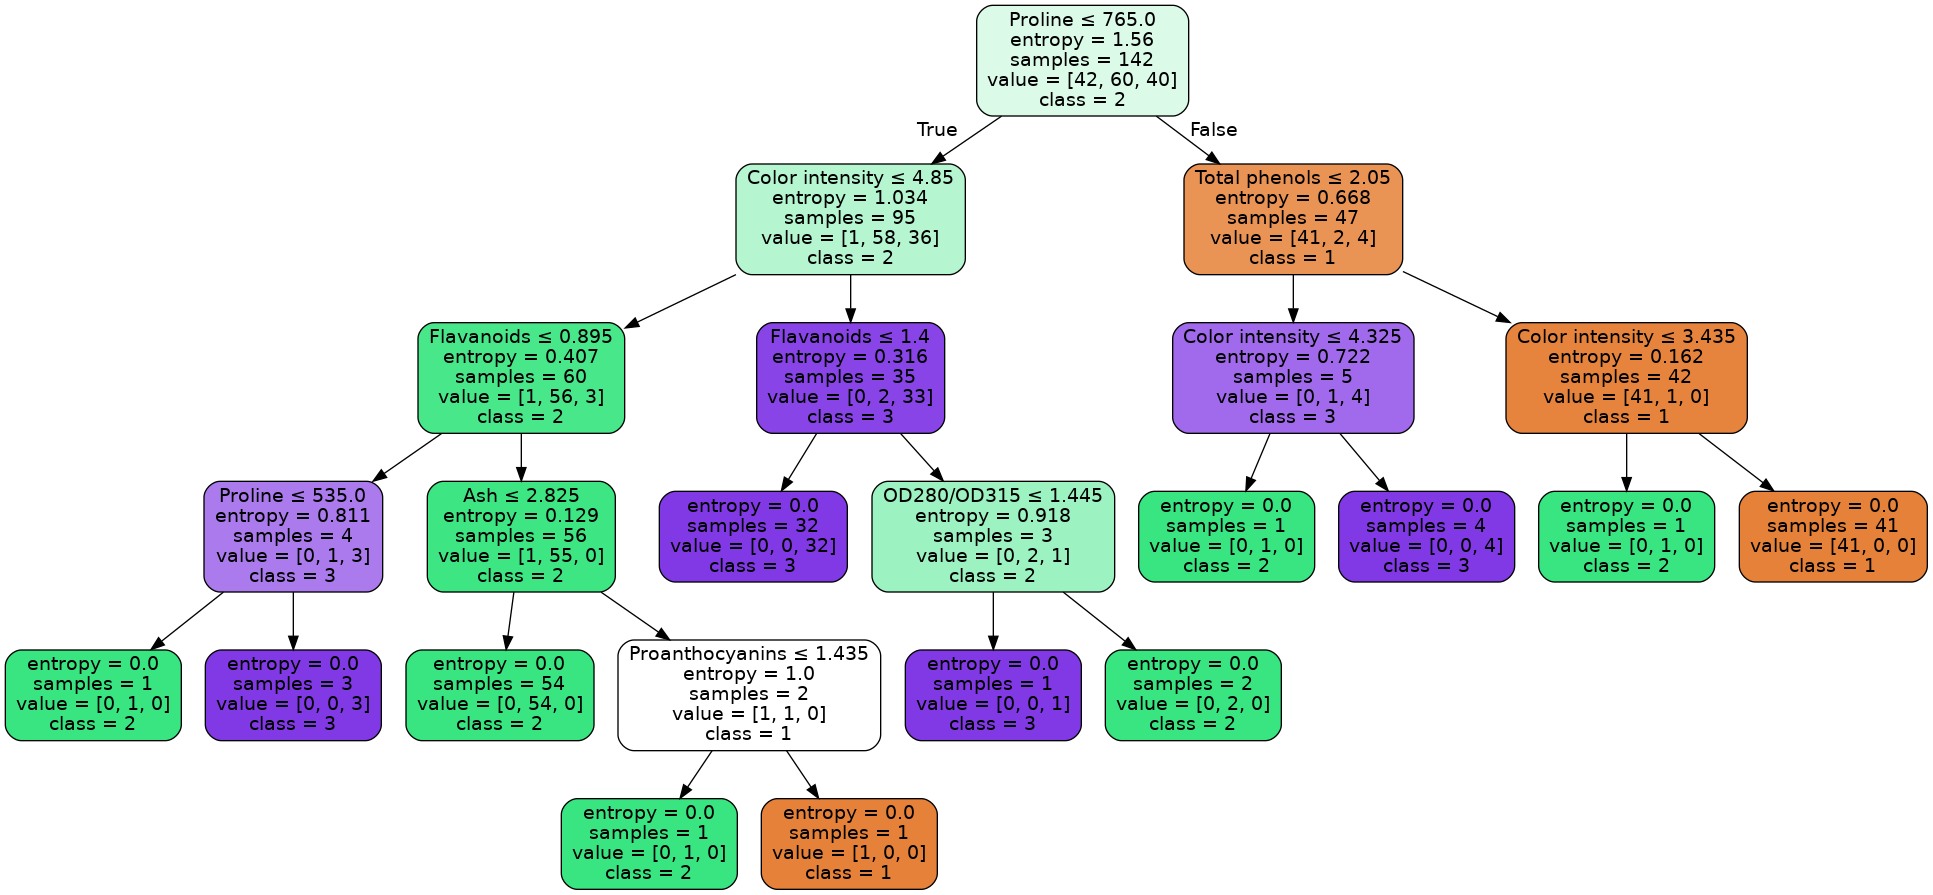

In [8]:
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### Tuning

In class we discussed _'pruning'_ to deal with overfitting.  

Here we will look at 3 simpler approaches:  
1. max depth
2. minimum samples split
3. minimum samples leaf

In [9]:
# Max Depth of tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.8611111111111112


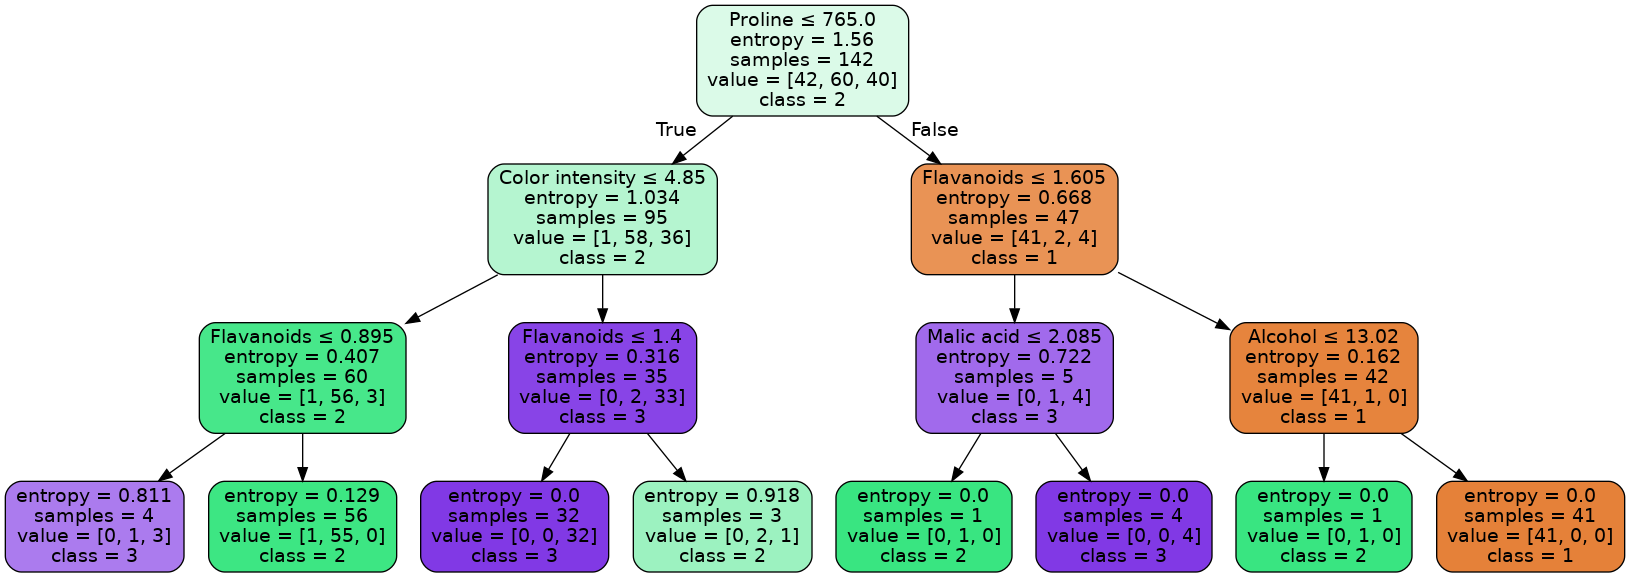

In [10]:
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [11]:
X_test.iloc[0]

Alcohol                  13.87
Malic acid                1.90
Ash                       2.80
Alcalinity of ash        19.40
Magnesium               107.00
Total phenols             2.95
Flavanoids                2.97
Nonflavanoid phenols      0.37
Proanthocyanins           1.76
Color intensity           4.50
Hue                       1.25
OD280/OD315               3.40
Proline                 915.00
Name: 28, dtype: float64

In [12]:
y_pred[0]

1

In [13]:
#Min Sample Split
# Read as 'minimum samples at a node to consider for splitting'
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.8611111111111112


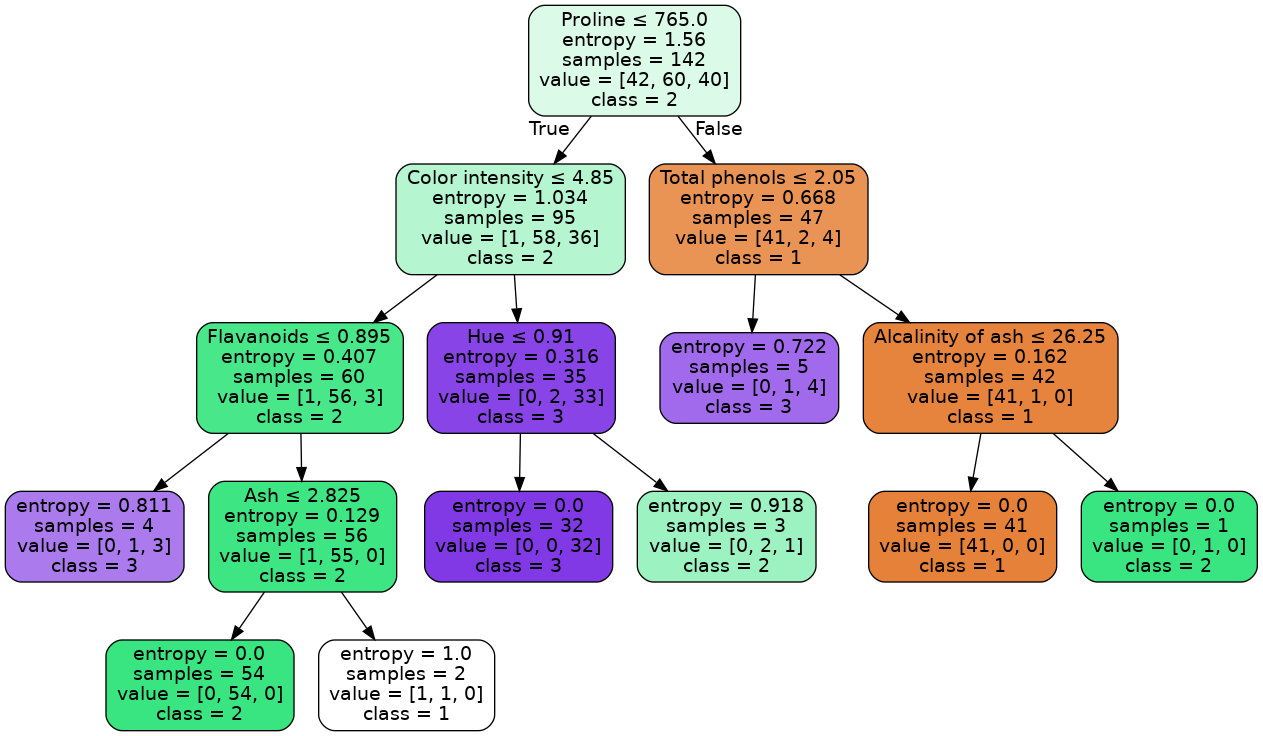

In [14]:
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [15]:
#min samples leaf
# Read as 'leaf should have atleast x samples'
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

Test accuracy = 0.75


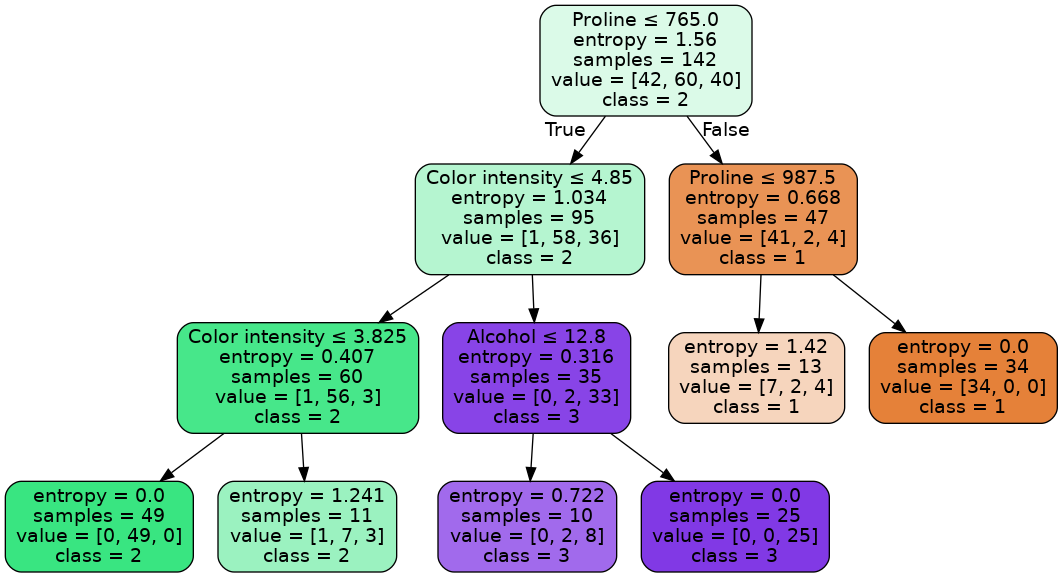

In [16]:
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['1','2','3'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())